In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

%matplotlib inline

In [3]:
# Load the dataset (from local file or seaborn)
try:
    df = pd.read_csv('titanic.csv')  # If you have the file locally
except:
    df = sns.load_dataset('titanic')  # Built-in dataset from seaborn

# Display first 5 rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()  # Shows columns, data types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.describe()  # For numerical columns
df.describe(include='object')  # For categorical columns

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [9]:
# Fill missing 'age' with median
df['age'] = df['age'].fillna(df['age'].median())

# Fill missing 'embarked' with mode (most frequent value)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop 'deck' (too many missing values)
df.drop('deck', axis=1, inplace=True)

# Verify no more missing values
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [11]:
print("Duplicates:", df.duplicated().sum()) 

Duplicates: 116


In [13]:
# Cap 'fare' at 99th percentile to reduce skewness
fare_cap = df['fare'].quantile(0.99)
df['fare'] = df['fare'].apply(lambda x: fare_cap if x > fare_cap else x)

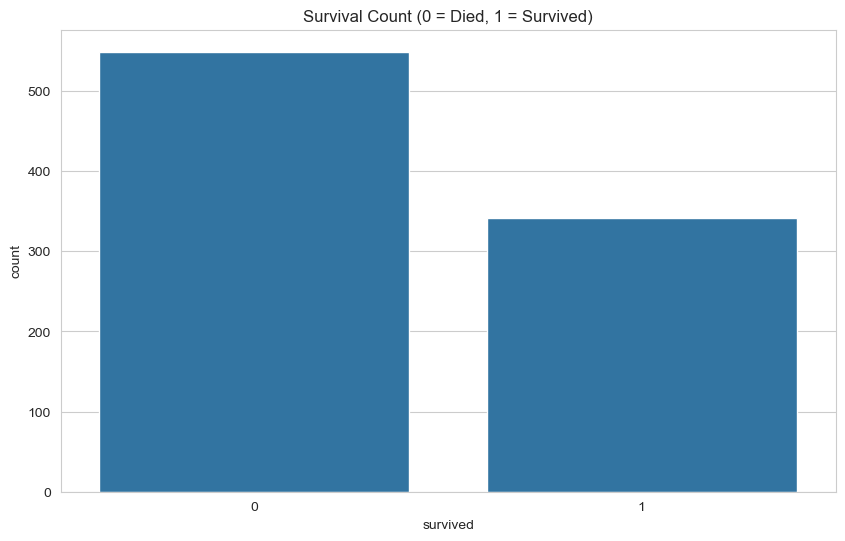

In [15]:
# Survival count
sns.countplot(x='survived', data=df)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

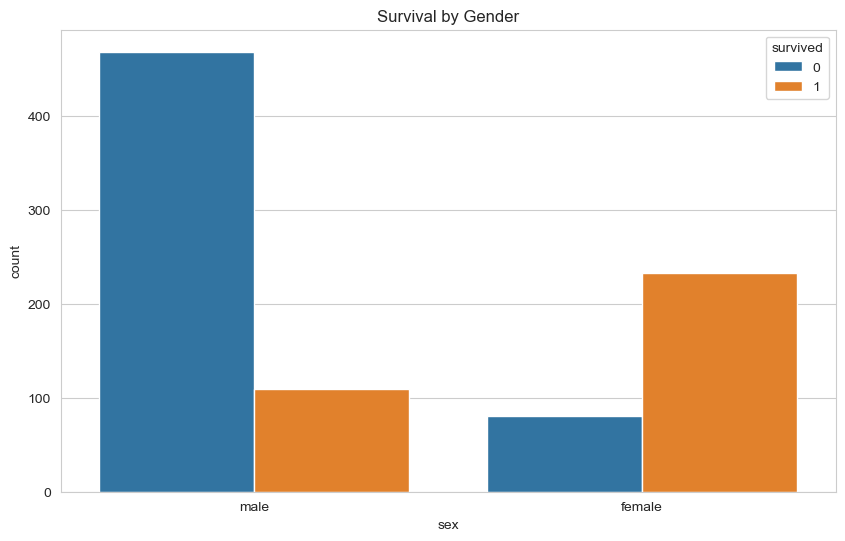

In [17]:
# Survival by gender
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()

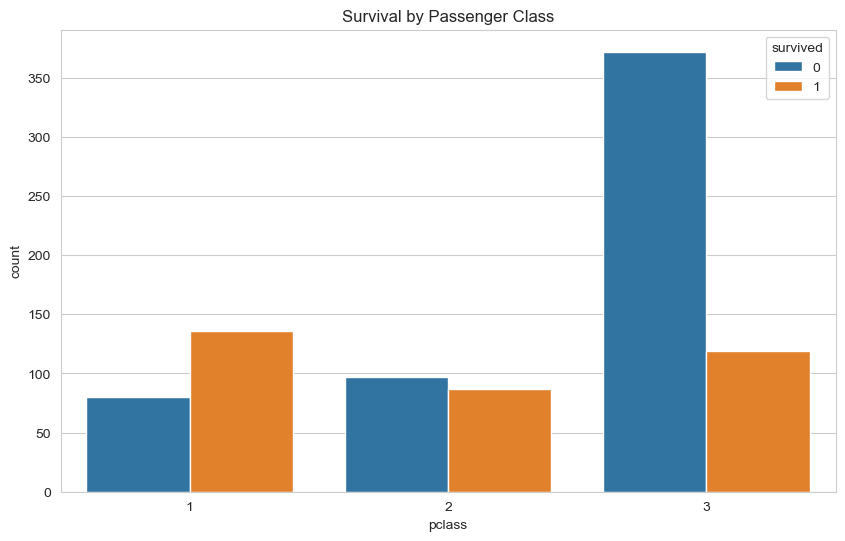

In [19]:
# Survival by passenger class
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

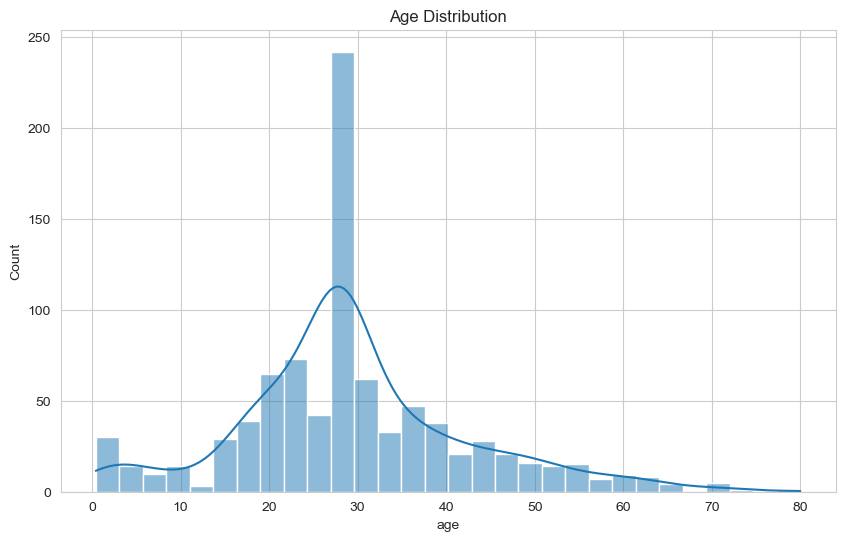

In [21]:
# Age distribution
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

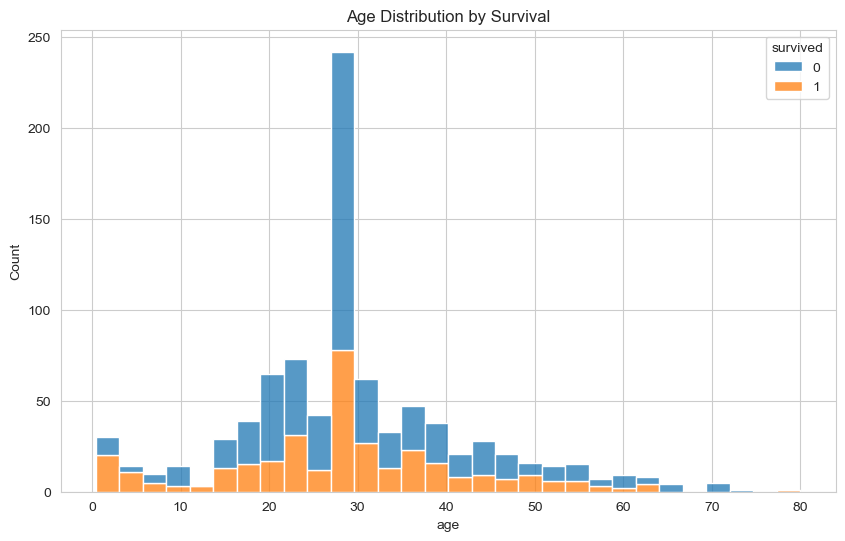

In [23]:
# Age vs. Survival
sns.histplot(data=df, x='age', hue='survived', multiple='stack')
plt.title("Age Distribution by Survival")
plt.show()

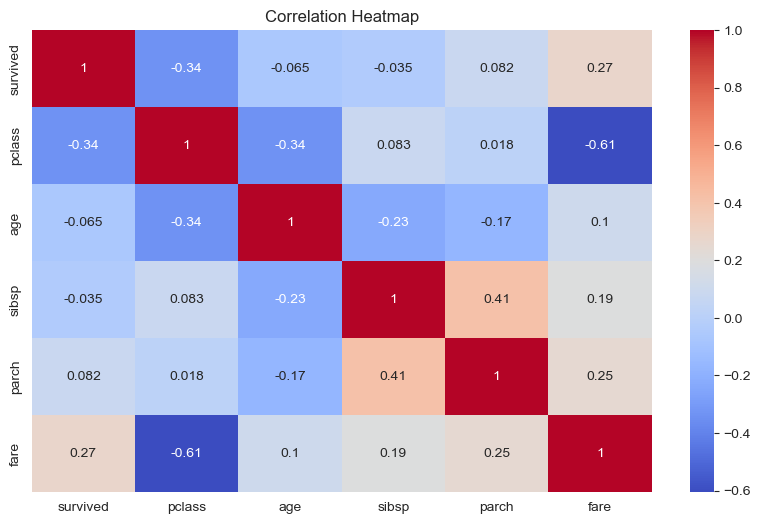

In [25]:
# Select numerical columns
numeric_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
corr = df[numeric_cols].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [27]:
print(f"Overall survival rate: {df['survived'].mean() * 100:.1f}%")
print(f"Female survival rate: {df[df['sex'] == 'female']['survived'].mean() * 100:.1f}%")
print(f"1st class survival rate: {df[df['pclass'] == 1]['survived'].mean() * 100:.1f}%")

Overall survival rate: 38.4%
Female survival rate: 74.2%
1st class survival rate: 63.0%


In [29]:
# Survival rate for children (<10)
children_survival = df[df['age'] < 10]['survived'].mean() * 100
print(f"Children (<10) survival rate: {children_survival:.1f}%")

Children (<10) survival rate: 61.3%


In [31]:
df.to_csv('titanic_clean.csv', index=False)  # Save for further analysis